In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Set seed
np.random.seed(42)

# Daftar jenis buah
fruit_types = ['Apple', 'Banana', 'Orange', 'Grape', 'Mango']

# Jumlah data
n = 1000

# Generate DataFrame
data = pd.DataFrame({
    'fruit_type': np.random.choice(fruit_types, size=n),
    'weight': np.random.normal(150, 50, size=n),  # gram
    'color_score': np.random.uniform(0, 1, size=n),  # nilai 0-1 representasi warna
    'diameter': np.random.normal(7, 1.5, size=n),  # cm
    'sweetness': np.random.randint(1, 11, size=n),  # skala 1-10
    'acidity': np.random.uniform(2.5, 5.0, size=n),  # pH
    'ripeness': np.random.randint(1, 6, size=n),  # skala 1-5
    'firmness': np.random.randint(1, 11, size=n),  # skala 1-10
    'has_seeds': np.random.choice(['Yes', 'No'], size=n),
    'season': np.random.choice(['Summer', 'Winter', 'Spring', 'Autumn'], size=n)
})

data.head()


,fruit_type,weight,color_score,diameter,sweetness,acidity,ripeness,firmness,has_seeds,season
0,Grape,155.469740,0.105474,6.655914,10,2.924398,3,5,Yes,Spring
1,Mango,186.288331,0.656780,6.934785,4,2.739102,5,4,No,Summer
2,Orange,174.050462,0.822103,4.703339,2,3.547840,4,4,Yes,Summer
3,Mango,161.194201,0.380420,7.771382,4,2.783249,3,4,No,Summer
4,Mango,110.476277,0.775612,7.858086,1,2.929781,3,9,No,Autumn


Statistik Deskriptif:
            weight  color_score     diameter    sweetness      acidity  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    153.474276     0.502604     7.009452     5.564000     3.712251   
std      50.213350     0.289411     1.516764     2.915545     0.736424   
min       3.932476     0.000012     2.513296     1.000000     2.501569   
25%     119.717981     0.271331     5.951047     3.000000     3.063207   
50%     152.809371     0.503940     6.997962     6.000000     3.687510   
75%     185.425914     0.753561     8.019545     8.000000     4.343381   
max     309.655378     0.997821    12.889357    10.000000     4.997624   

          ripeness    firmness  
count  1000.000000  1000.00000  
mean      2.947000     5.41900  
std       1.401483     2.98133  
min       1.000000     1.00000  
25%       2.000000     3.00000  
50%       3.000000     5.00000  
75%       4.000000     8.00000  
max       5.000000    10.00000  

Distribusi Je

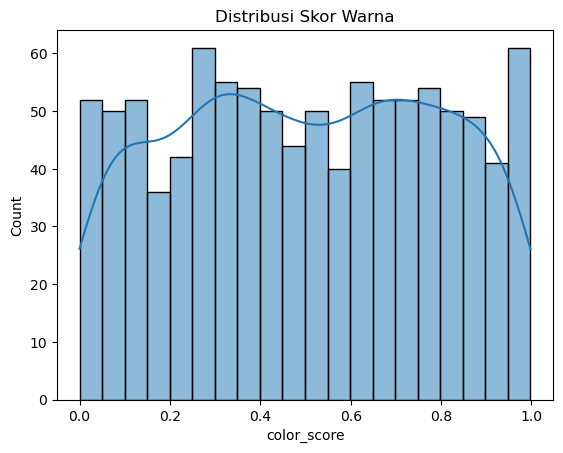

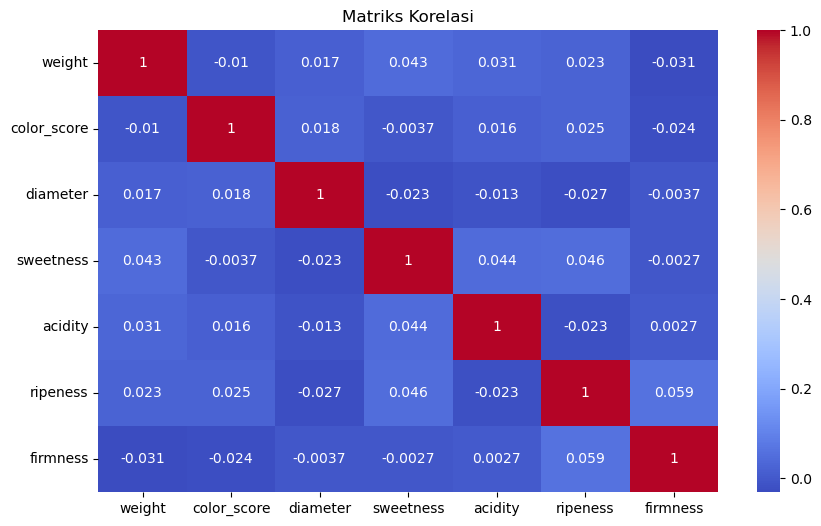

In [4]:
# Statistik numerik
print("Statistik Deskriptif:")
print(data.describe())

# Distribusi kategori
print("\nDistribusi Jenis Buah:")
print(data['fruit_type'].value_counts())

# Distribusi warna
sns.histplot(data['color_score'], bins=20, kde=True)
plt.title("Distribusi Skor Warna")
plt.show()

# Korelasi antar fitur numerik
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()


In [6]:
# Encode kolom kategorikal
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['fruit_type', 'has_seeds', 'season']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Simpan dataset
data.to_csv('dataset_buah.csv', index=False)
